# Bank Loan Risk Assessment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("EMI_dataset-1.csv")

In [3]:
df.head()

,candidate_id,country,organization,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13
0,2.680000e+11,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,1/3/2012,12-May,95,1,...,0,0,0,1,0,0,0,0,0,1
1,6.730000e+11,Y,"Swanson, Newton and Miller",4.875,144000,360,1/1/2012,12-Mar,72,1,...,0,0,0,0,0,0,0,1,0,1
2,7.430000e+11,Z,Thornton-Davis,3.250,366000,180,1/1/2012,12-Mar,49,1,...,0,0,0,0,0,0,0,0,0,1
3,6.010000e+11,X,OTHER,4.750,135000,360,1/2/2012,12-Apr,46,2,...,0,0,0,0,0,1,1,1,1,1
4,2.740000e+11,X,OTHER,4.750,124000,360,1/2/2012,12-Apr,80,1,...,3,4,5,6,7,8,9,10,11,1


In [4]:
df.shape

(49999, 29)

In [5]:
df.dtypes

candidate_id                float64
country                      object
organization                 object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers           int64
debt_to_income_ratio          int64
borrower_credit_score         int64
loan_purpose                 object
insurance_percent             int64
co-borrower_credit_score      int64
insurance_type                int64
E1                            int64
E2                            int64
E3                            int64
E4                            int64
E5                            int64
E6                            int64
E7                            int64
E8                            int64
E9                            int64
E10                           int64
E11                           int64
E12                         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   candidate_id              49999 non-null  float64
 1   country                   49999 non-null  object 
 2   organization              49999 non-null  object 
 3   interest_rate             49999 non-null  float64
 4   unpaid_principal_bal      49999 non-null  int64  
 5   loan_term                 49999 non-null  int64  
 6   origination_date          49999 non-null  object 
 7   first_payment_date        49999 non-null  object 
 8   loan_to_value             49999 non-null  int64  
 9   number_of_borrowers       49999 non-null  int64  
 10  debt_to_income_ratio      49999 non-null  int64  
 11  borrower_credit_score     49999 non-null  int64  
 12  loan_purpose              49999 non-null  object 
 13  insurance_percent         49999 non-null  int64  
 14  co-bor

In [7]:
df.isnull().sum()

candidate_id                0
country                     0
organization                0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
E1                          0
E2                          0
E3                          0
E4                          0
E5                          0
E6                          0
E7                          0
E8                          0
E9                          0
E10                         0
E11                         0
E12                         0
E13                         0
dtype: int64

In [8]:
df.columns

Index(['candidate_id', 'country', 'organization', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12',
       'E13'],
      dtype='object')

In [9]:
#Identifying the unique member of values in the datasets
df.nunique()

candidate_id                901
country                       3
organization                 19
interest_rate               601
unpaid_principal_bal        621
loan_term                    89
origination_date              3
first_payment_date            4
loan_to_value                92
number_of_borrowers           2
debt_to_income_ratio         54
borrower_credit_score       217
loan_purpose                  3
insurance_percent            10
co-borrower_credit_score    214
insurance_type                2
E1                            4
E2                            5
E3                            6
E4                            7
E5                            8
E6                            9
E7                           10
E8                           10
E9                           11
E10                          12
E11                          13
E12                          13
E13                           2
dtype: int64

In [11]:
df.drop(['E1','E2','E3','E4','E5','E6','E7','E8','E9','E10','E11','E12','E13'], axis=1, inplace=True)
df.head()

,candidate_id,country,organization,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type
0,2.680000e+11,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,1/3/2012,12-May,95,1,22,694,C86,30,0,0
1,6.730000e+11,Y,"Swanson, Newton and Miller",4.875,144000,360,1/1/2012,12-Mar,72,1,44,697,B12,0,0,0
2,7.430000e+11,Z,Thornton-Davis,3.250,366000,180,1/1/2012,12-Mar,49,1,33,780,B12,0,0,0
3,6.010000e+11,X,OTHER,4.750,135000,360,1/2/2012,12-Apr,46,2,44,633,B12,0,638,0
4,2.740000e+11,X,OTHER,4.750,124000,360,1/2/2012,12-Apr,80,1,43,681,C86,0,0,0


In [12]:
df.describe()

,candidate_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type
count,4.999900e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,5.483227e+11,3.872062,208865.277306,292.400068,67.410128,1.590692,30.820236,769.336127,2.778676,457.499450,0.003060
std,2.596753e+11,0.461701,115036.131987,89.704097,17.305810,0.491711,9.722376,42.798725,8.082600,382.249913,0.055234
min,1.000000e+11,2.375000,14000.000000,71.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.240000e+11,3.500000,120000.000000,180.000000,57.000000,1.000000,23.000000,750.000000,0.000000,0.000000,0.000000
50%,5.470000e+11,3.875000,184000.000000,360.000000,72.000000,2.000000,31.000000,781.000000,0.000000,739.000000,0.000000
75%,7.730000e+11,4.125000,280000.000000,360.000000,80.000000,2.000000,39.000000,799.000000,0.000000,791.000000,0.000000
max,1.000000e+12,6.625000,968000.000000,360.000000,97.000000,2.000000,61.000000,840.000000,35.000000,834.000000,1.000000


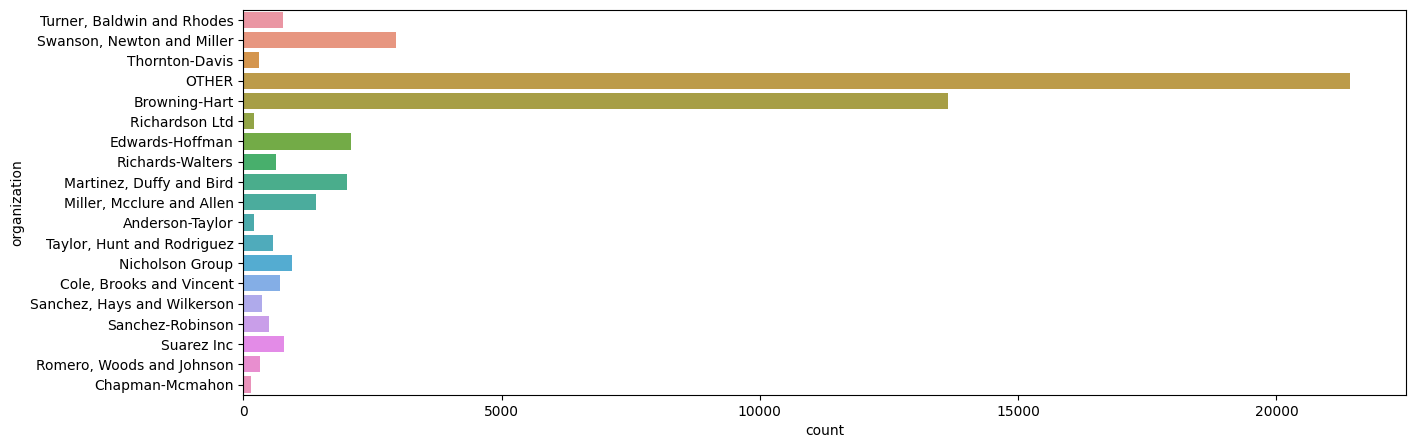

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(y='organization',data=df)
plt.show()

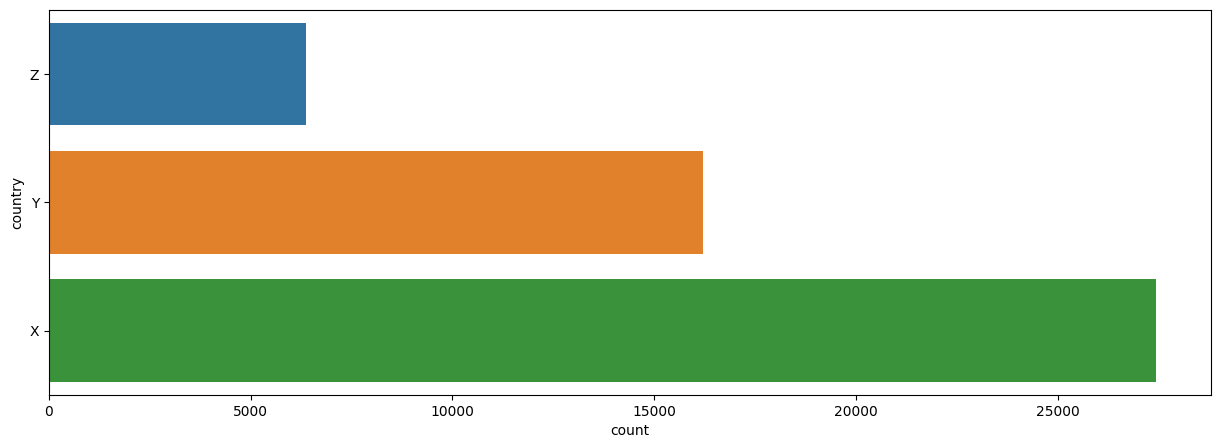

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(y='country',data=df)
plt.show()

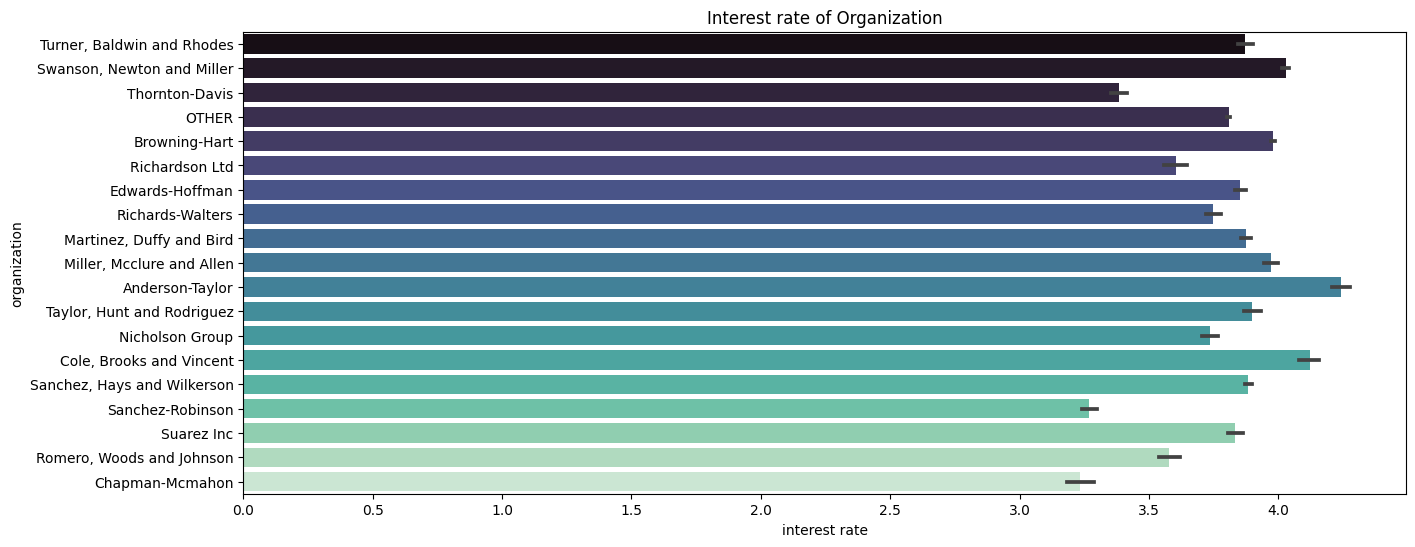

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(x='interest_rate', y='organization' , palette='mako', data=df)
plt.title('Interest rate of Organization')
plt.xlabel('interest rate')
plt.ylabel('organization')
plt.show()

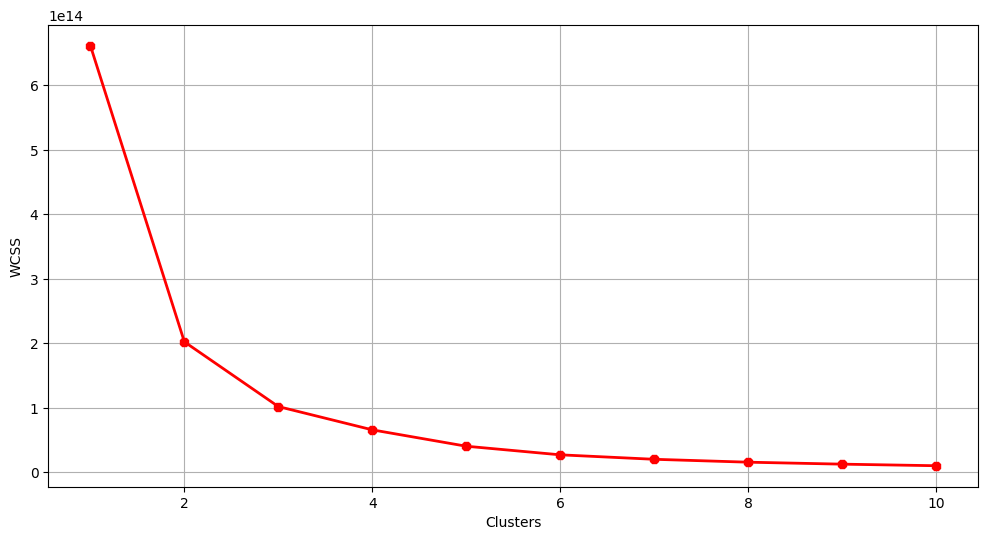

In [35]:
X1=df.loc[:,  ['interest_rate','unpaid_principal_bal']].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init ='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker='8')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
from sklearn.cluster import KMeans

# Select the features to use for clustering
features = ['interest_rate','unpaid_principal_bal']

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(df[features])

KMeans(n_clusters=2)

In [17]:
# Predict the cluster labels for each data point
labels = kmeans.predict(df[features])
labels

array([0, 0, 1, ..., 1, 1, 0])

In [18]:
# Add the cluster labels to the DataFrame
df["cluster"] = labels

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[3.87036855e+00, 1.42698494e+05],
       [3.87561423e+00, 3.47684739e+05]])

In [19]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_score = silhouette_score(df[features], labels)
print("Silhouette score:", silhouette_score)

Silhouette score: 0.6255673945816566


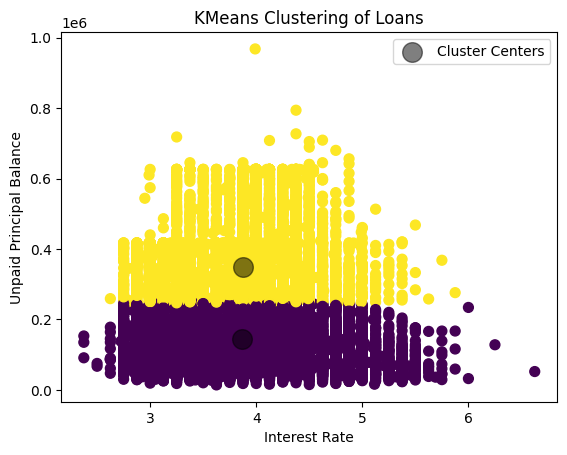

In [57]:
# Plot the clusters
plt.scatter(df['interest_rate'], df['unpaid_principal_bal'], c=df['cluster'], s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5, label="Cluster Centers")
plt.title('KMeans Clustering of Loans')
plt.xlabel('Interest Rate')
plt.ylabel('Unpaid Principal Balance')
plt.legend()
plt.show()


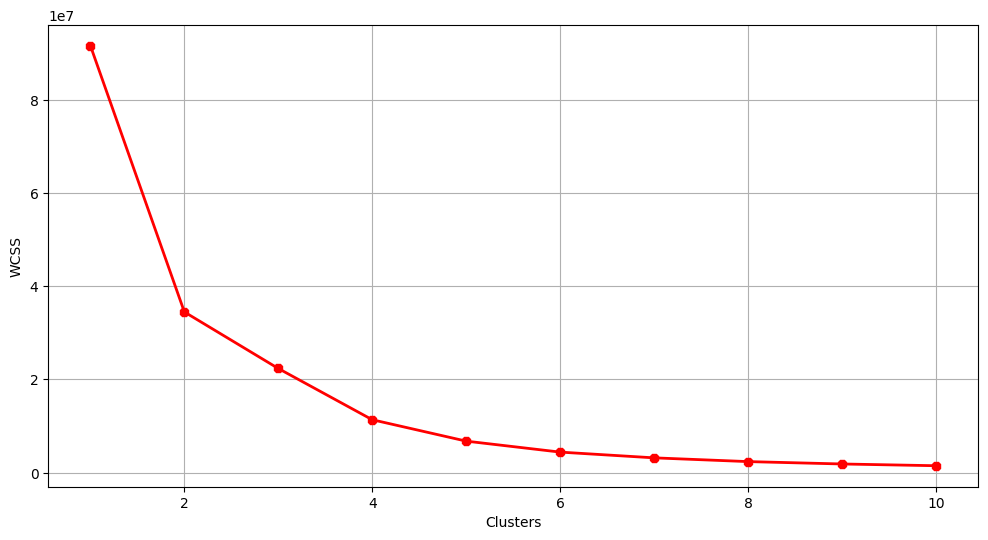

In [36]:
X1=df.loc[:,  ['interest_rate','borrower_credit_score']].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init ='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker='8')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()


In [38]:
from sklearn.cluster import KMeans

# Select the features to use for clustering
features = ['interest_rate','borrower_credit_score']

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(df[features])

KMeans(n_clusters=2)

In [39]:
# Predict the cluster labels for each data point
labels = kmeans.predict(df[features])
labels

array([0, 0, 1, ..., 1, 0, 0])

In [40]:
# Add the cluster labels to the DataFrame
df["cluster"] = labels

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[  4.02083735, 711.49721065],
       [  3.82126046, 789.08596265]])

In [41]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_score = silhouette_score(df[features], labels)
print("Silhouette score:", silhouette_score)

Silhouette score: 0.6595559186028273


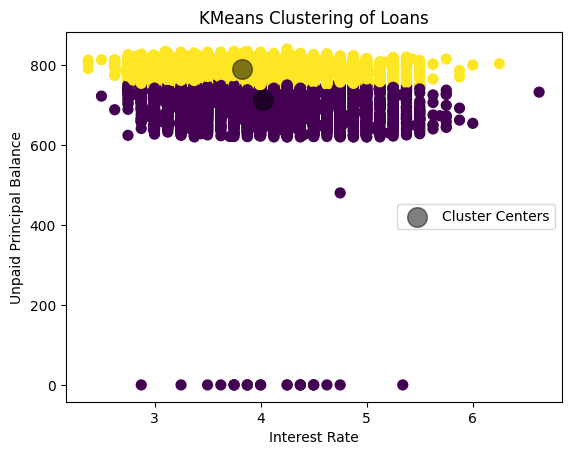

In [42]:
# Plot the clusters
plt.scatter(df['interest_rate'], df['borrower_credit_score'], c=df['cluster'], s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', s=200, alpha=0.5, label="Cluster Centers")
plt.title('KMeans Clustering of Loans')
plt.xlabel('Interest Rate')
plt.ylabel('Unpaid Principal Balance')
plt.legend()
plt.show()


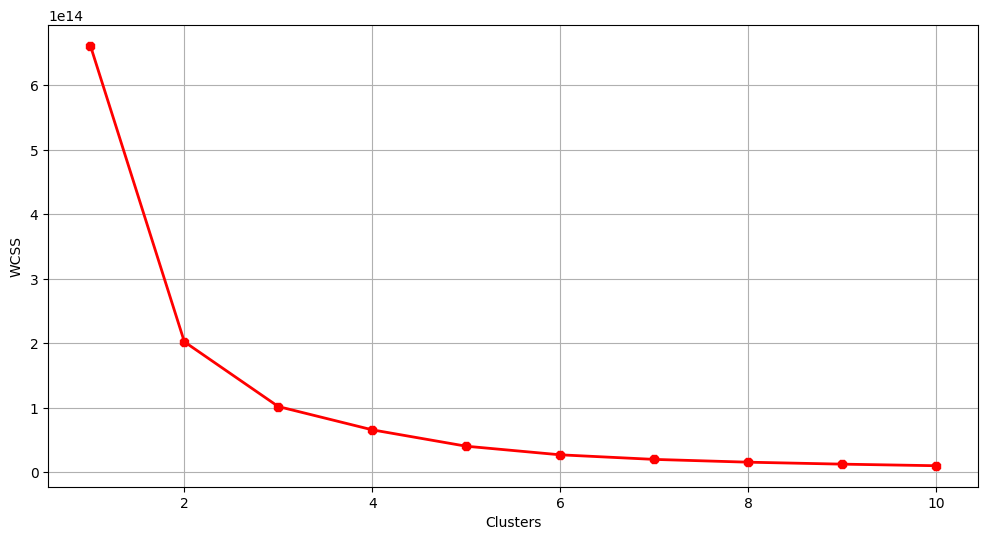

In [43]:
X1=df.loc[:,  ['interest_rate','unpaid_principal_bal','borrower_credit_score']].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init ='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker='8')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()


In [44]:
from sklearn.cluster import KMeans

# Select the features to use for clustering
features = ['interest_rate','unpaid_principal_bal','borrower_credit_score']

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(df[features])

KMeans(n_clusters=2)

In [45]:
# Predict the cluster labels for each data point
labels = kmeans.predict(df[features])
labels

array([0, 0, 1, ..., 1, 1, 0])

In [46]:
# Add the cluster labels to the DataFrame
df["cluster"] = labels

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[3.87032396e+00, 1.42978411e+05, 7.68370317e+02],
       [3.87573864e+00, 3.48267714e+05, 7.71379573e+02]])

In [47]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_score = silhouette_score(df[features], labels)
print("Silhouette score:", silhouette_score)

Silhouette score: 0.6255653695192125


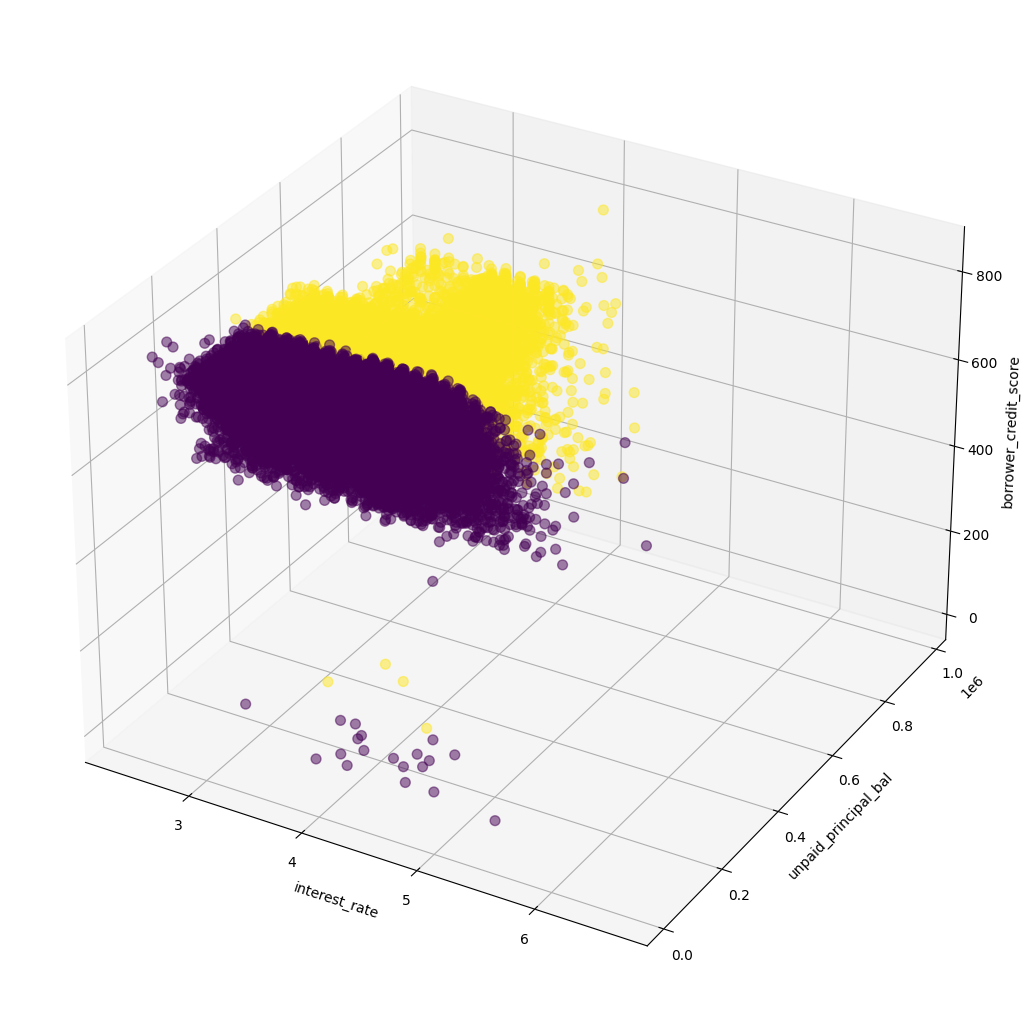

In [50]:
fig = plt.figure(figsize=(10, 10))

ax = plt.subplot(111, projection="3d")
# This will generate the warning

# ax = Axes3D(fig)

# This will suppress the warning
ax = fig.add_axes([0, 0, 1, 1], projection="3d")

ax.scatter(df[features[0]], df[features[1]], df[features[2]], c=df["cluster"], s=50, cmap="viridis", alpha = 0.5)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])

plt.show()

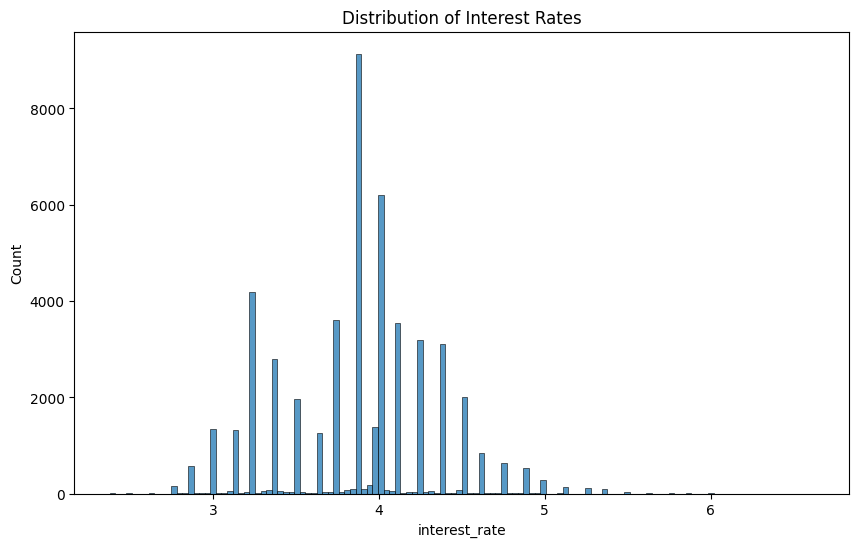

In [52]:
# Plot the distribution of interest rates
plt.figure(figsize=(10, 6))
sns.histplot(df["interest_rate"])
plt.title("Distribution of Interest Rates")
plt.show()

Distribution of unpaid principal balance by loan purpose: This visualization shows that the distribution of unpaid principal balance varies significantly by loan purpose. For example, borrowers who took out loans for debt consolidation have a much higher unpaid principal balance than borrowers who took out loans for home improvement.

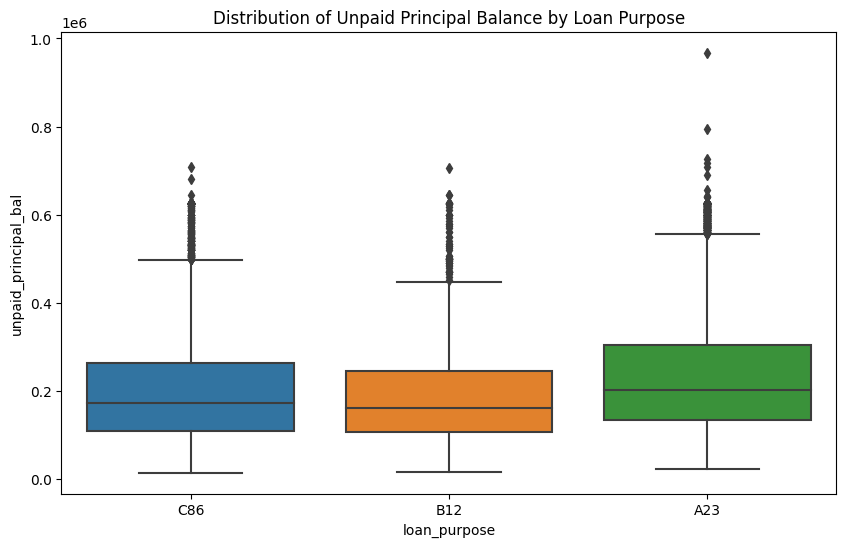

In [53]:
# Plot the distribution of unpaid principal balance by loan purpose
plt.figure(figsize=(10, 6))
sns.boxplot(x="loan_purpose", y="unpaid_principal_bal", data=df)
plt.title("Distribution of Unpaid Principal Balance by Loan Purpose")
plt.show()